In [85]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [87]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [88]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [89]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
data   

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [90]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

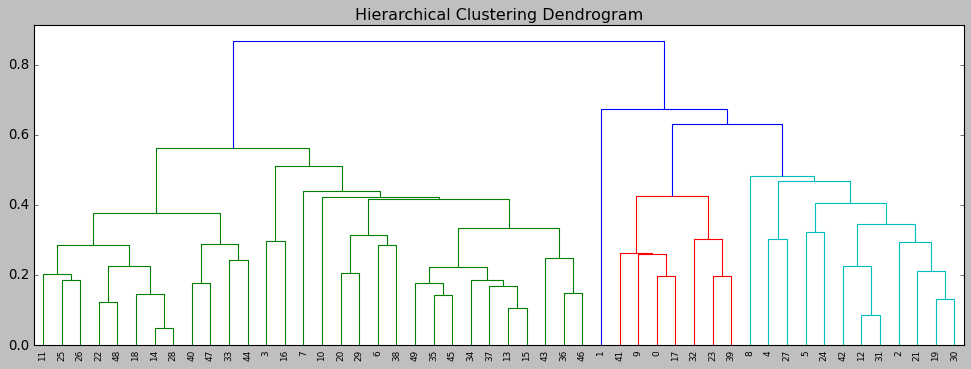

In [91]:
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')

sch.dendrogram(
    z,
    
)
plt.show() 

In [92]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean',linkage= 'single')
hc.fit(df_norm)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [93]:
hc.labels_

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [95]:
clusters = pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [96]:
df['clusters'] = clusters

In [97]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [98]:
df[df['clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
12,Illinois,10.4,249,83,24.0,0


In [99]:
df[df['clusters']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
7,Delaware,5.9,238,72,15.8,1


In [100]:
df[df['clusters']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
8,Florida,15.4,335,80,31.9,2


In [101]:
df[df['clusters']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
1,Alaska,10.0,263,48,44.5,3


## ============================KMeans=============================== 

In [102]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [103]:
df2 = pd.read_csv("crime_data.csv")
df2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [104]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [105]:
df_norm = norm_func(df2.iloc[:,1:]) 

In [106]:
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [107]:
from sklearn.cluster import KMeans

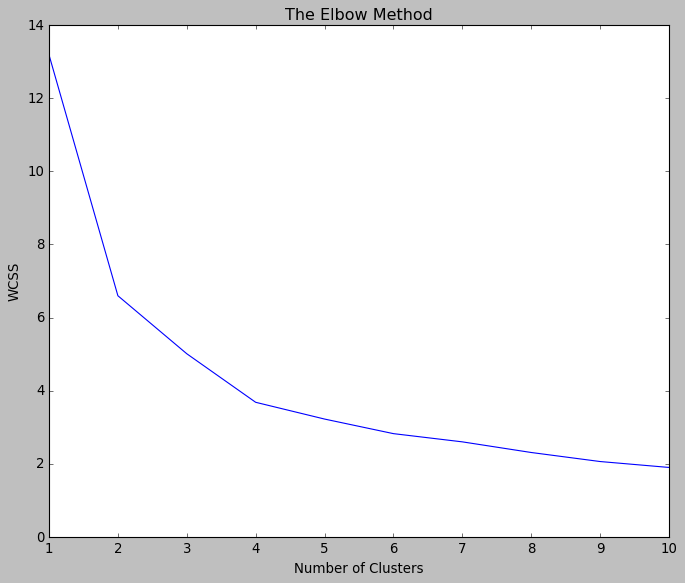

In [108]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [109]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  

In [110]:
y_kmeans
clf.labels_ 

array([3, 1, 1, 0, 1, 1, 4, 0, 1, 3, 4, 2, 1, 0, 2, 0, 0, 3, 2, 1, 4, 1,
       2, 3, 0, 0, 0, 1, 2, 4, 1, 1, 3, 2, 4, 0, 0, 4, 4, 3, 2, 3, 1, 4,
       2, 0, 4, 2, 2, 0])

In [111]:
y_kmeans 

array([3, 1, 1, 0, 1, 1, 4, 0, 1, 3, 4, 2, 1, 0, 2, 0, 0, 3, 2, 1, 4, 1,
       2, 3, 0, 0, 0, 1, 2, 4, 1, 1, 3, 2, 4, 0, 0, 4, 4, 3, 2, 3, 1, 4,
       2, 0, 4, 2, 2, 0])

In [112]:
clf.cluster_centers_

array([[0.37198795, 0.35416667, 0.51412429, 0.32235142],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072]])

In [113]:
clf.inertia_

3.183157731676654

In [114]:
md=pd.Series(y_kmeans)   
df2['clust']=md
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [115]:
df2.iloc[:,1:5].groupby(df2.clust).mean() 

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,6.975000,148.416667,62.333333,19.775000
1,10.966667,264.000000,76.500000,33.608333
2,2.680000,70.100000,51.000000,10.910000
3,14.671429,251.285714,54.285714,21.685714
4,4.955556,125.444444,80.111111,17.788889


In [116]:
plt.style.use(['classic']) 
print(plt.style.available)   

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

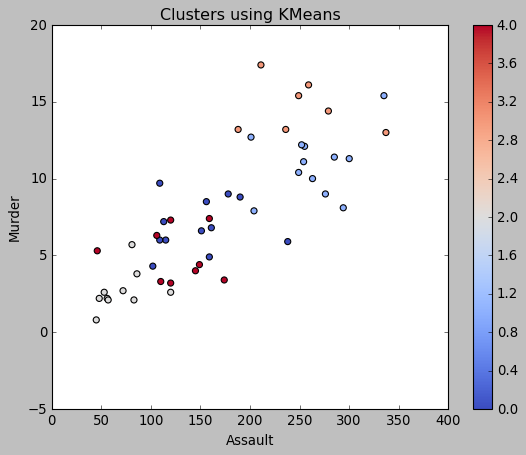

In [117]:
df2.plot(x="Assault",y ="Murder",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [118]:
WCSS  

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.22507225604479,
 2.826272650544872,
 2.6015626533136813,
 2.310631949703298,
 2.06360454264937,
 1.9017594203687676]

## ============================Dbscan=============================

In [119]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [120]:
stscaler = StandardScaler().fit(df_norm)
X = stscaler.transform(df_norm) 
X   

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [121]:
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)  

DBSCAN(eps=0.475)

In [122]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [123]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [124]:
cl
pd.set_option("display.max_rows", None)  

In [125]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [126]:
df2 = pd.concat([df,cl],axis=1)  
df2     

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,cluster
0,Alabama,13.2,236,58,21.2,0,-1
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,0,-1
3,Arkansas,8.8,190,50,19.5,0,-1
4,California,9.0,276,91,40.6,0,-1
5,Colorado,7.9,204,78,38.7,0,-1
6,Connecticut,3.3,110,77,11.1,0,-1
7,Delaware,5.9,238,72,15.8,1,-1
8,Florida,15.4,335,80,31.9,2,-1
9,Georgia,17.4,211,60,25.8,0,-1


In [127]:
>>> plt.style.use('classic')   

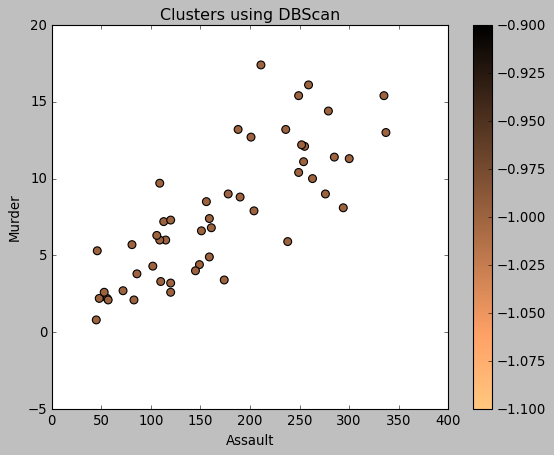

In [128]:
df2.plot(x="Assault",y ="Murder",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')      
plt.show()

In [129]:
dl = dbscan.labels_ 

In [131]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)

In [132]:
y_kmeans

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [133]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,1
1,1
2,1
3,0
4,1
5,1
6,2
7,2
8,1
9,1


In [135]:
df3 = pd.concat([df2,cl1],axis=1) 
df3 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,cluster,Kcluster
0,Alabama,13.2,236,58,21.2,0,-1,1
1,Alaska,10.0,263,48,44.5,3,-1,1
2,Arizona,8.1,294,80,31.0,0,-1,1
3,Arkansas,8.8,190,50,19.5,0,-1,0
4,California,9.0,276,91,40.6,0,-1,1
5,Colorado,7.9,204,78,38.7,0,-1,1
6,Connecticut,3.3,110,77,11.1,0,-1,2
7,Delaware,5.9,238,72,15.8,1,-1,2
8,Florida,15.4,335,80,31.9,2,-1,1
9,Georgia,17.4,211,60,25.8,0,-1,1


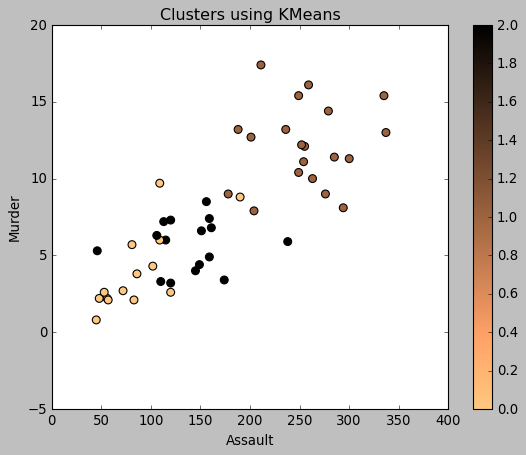

In [137]:
df2.plot(x="Assault",y ="Murder",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 
plt.show()

In [138]:
from sklearn.neighbors import NearestNeighbors  

In [139]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  